In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
ds = pd.read_csv('Data_Set/kidney_disease.csv')
ds

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
ds = ds.rename(columns={'bgr': 'glucose'})
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  glucose         356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
ds.shape

(400, 26)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  glucose         356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
ds['classification'].value_counts(normalize=True)

classification
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64

c:\Users\dines\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


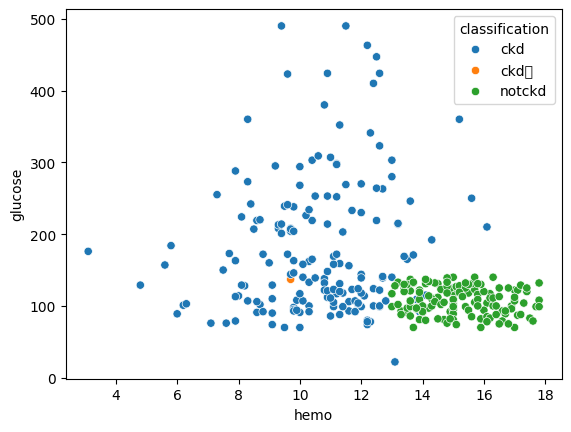

In [7]:
sn.scatterplot(x='hemo', y='glucose', hue='classification', data=ds)
plt.show()

c:\Users\dines\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


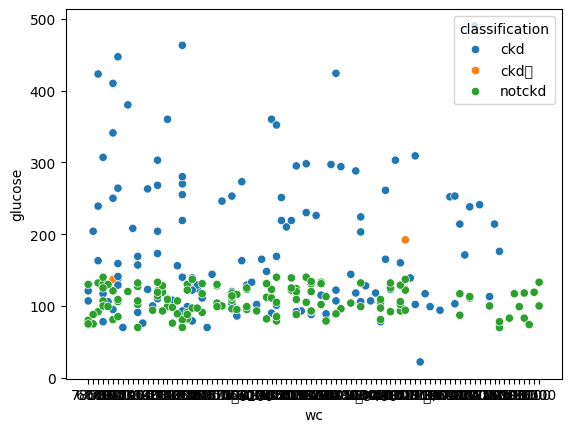

In [8]:
sn.scatterplot(x='wc', y='glucose', hue='classification', data=ds)
plt.show()

In [9]:
y = ds['classification']
y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: classification, dtype: object

In [10]:
x = ds.drop(columns=['classification'])
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       400 non-null    int64  
 1   age      391 non-null    float64
 2   bp       388 non-null    float64
 3   sg       353 non-null    float64
 4   al       354 non-null    float64
 5   su       351 non-null    float64
 6   rbc      248 non-null    object 
 7   pc       335 non-null    object 
 8   pcc      396 non-null    object 
 9   ba       396 non-null    object 
 10  glucose  356 non-null    float64
 11  bu       381 non-null    float64
 12  sc       383 non-null    float64
 13  sod      313 non-null    float64
 14  pot      312 non-null    float64
 15  hemo     348 non-null    float64
 16  pcv      330 non-null    object 
 17  wc       295 non-null    object 
 18  rc       270 non-null    object 
 19  htn      398 non-null    object 
 20  dm       398 non-null    object 
 21  cad      398 non

In [11]:

# x = x[['age', 'bp', 'sg', 'al', 'su', 'glucose','bu','sc','sod','pot','hemo','pcv','wc','rc']]
x = x[['age', 'bp', 'sg', 'al', 'su', 'glucose']]
x.head()

,age,bp,sg,al,su,glucose
0,48.0,80.0,1.020,1.0,0.0,121.0
1,7.0,50.0,1.020,4.0,0.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0
3,48.0,70.0,1.005,4.0,0.0,117.0
4,51.0,80.0,1.010,2.0,0.0,106.0


In [12]:

X_train , X_test , Y_train , Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
X_train.head()

,age,bp,sg,al,su,glucose
336,25.0,60.0,1.020,0.0,0.0,119.0
64,55.0,80.0,1.010,0.0,0.0,146.0
55,35.0,80.0,1.005,3.0,0.0,NaN
106,50.0,90.0,NaN,NaN,NaN,89.0
300,45.0,60.0,1.020,0.0,0.0,114.0


In [14]:
X_test.head()

,age,bp,sg,al,su,glucose
132,50.0,NaN,NaN,NaN,NaN,219.0
309,51.0,60.0,1.020,0.0,0.0,129.0
341,63.0,70.0,1.025,0.0,0.0,130.0
196,49.0,100.0,1.010,3.0,0.0,129.0
246,48.0,110.0,1.015,3.0,0.0,106.0


In [15]:
Y_train.head()

336    notckd
64        ckd
55        ckd
106       ckd
300    notckd
Name: classification, dtype: object

In [16]:
Y_test.head()

132       ckd
309    notckd
341    notckd
196       ckd
246       ckd
Name: classification, dtype: object

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 6), (80, 6), (320,), (80,))

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Fit the model using the imputed data
knn.fit(X_train_imputed, Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
preds_train = knn.predict(X_train_imputed)  

In [21]:
preds_train

array(['notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ck

In [22]:
knn.score(X_train_imputed, Y_train)

0.878125

In [23]:
# Impute missing values in X_test using the same imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)
preds_test = knn.predict(X_test_imputed)

In [24]:
preds_test

array(['ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd'],
      dtype=object)

In [25]:
Y_test

132       ckd
309    notckd
341    notckd
196       ckd
246       ckd
        ...  
14        ckd
363    notckd
304    notckd
361    notckd
329    notckd
Name: classification, Length: 80, dtype: object

In [26]:
knn.score(X_test_imputed, Y_test)

0.875